In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:\\Users\\aneet\\Downloads\\house_price.csv")

In [8]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [9]:
df.tail()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
13195,Whitefield,5 Bedroom,3453.0,4.0,231.0,5,6689
13196,other,4 BHK,3600.0,5.0,400.0,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.0,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.0,4,10407
13199,Doddathoguru,1 BHK,550.0,1.0,17.0,1,3090


In [10]:
df.shape

(13200, 7)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [12]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [13]:
df.isnull().sum()/df.shape[0]*100

location          0.0
size              0.0
total_sqft        0.0
bath              0.0
price             0.0
bhk               0.0
price_per_sqft    0.0
dtype: float64

In [14]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
13195    False
13196    False
13197    False
13198    False
13199     True
Length: 13200, dtype: bool

In [15]:
df.duplicated().sum()

1049

In [16]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*15)   # identifying garbage values

location
other              2872
Whitefield          533
Sarjapur  Road      392
Electronic City     304
Kanakpura Road      264
                   ... 
Doddaballapur        11
Tindlu               11
Marsur               11
HAL 2nd Stage        11
Kodigehalli          11
Name: count, Length: 241, dtype: int64
*********************************************
size
2 BHK         5192
3 BHK         4277
4 Bedroom      816
4 BHK          574
3 Bedroom      541
1 BHK          527
2 Bedroom      325
5 Bedroom      293
6 Bedroom      190
1 Bedroom      100
7 Bedroom       83
8 Bedroom       83
5 BHK           56
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            7
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64
**********************

No garbage values

## EXPLORATORY DATA ANALYSIS

In [17]:
df.describe() 

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [18]:
df.describe(include="object")


,location,size
count,13200,13200
unique,241,31
top,other,2 BHK
freq,2872,5192


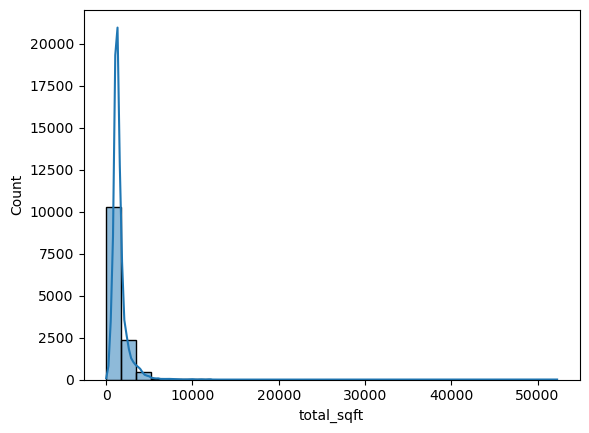

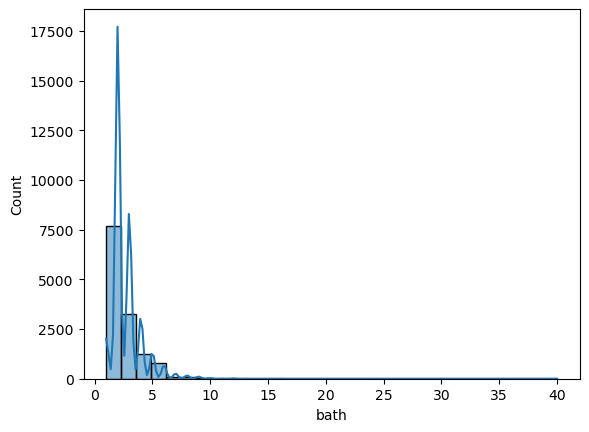

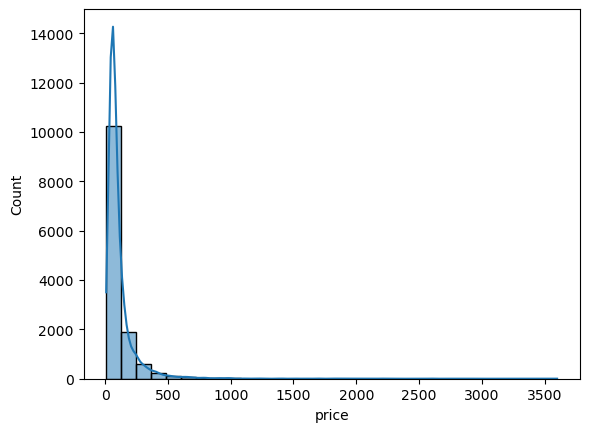

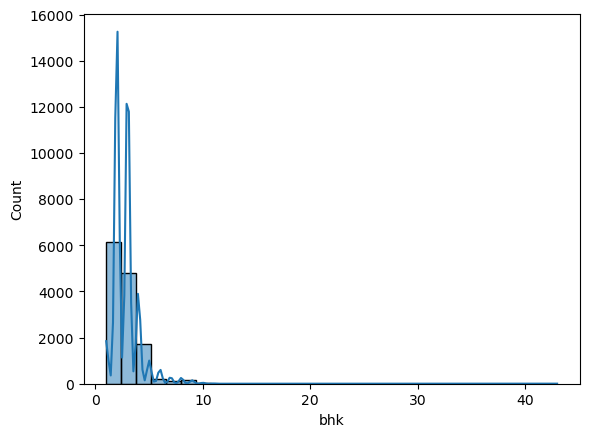

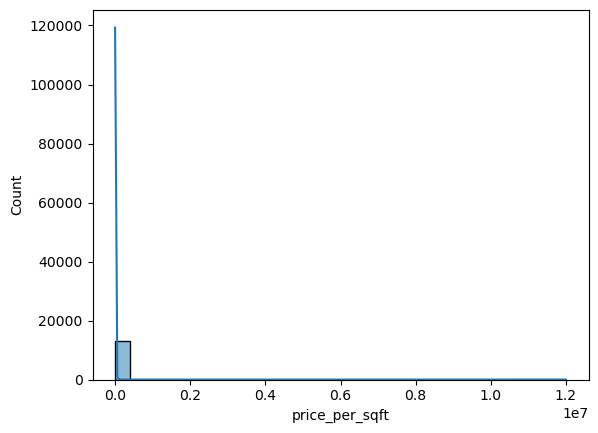

In [20]:
import warnings as wr
wr.filterwarnings("ignore")

for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i,bins=30,kde='True')
  plt.show()

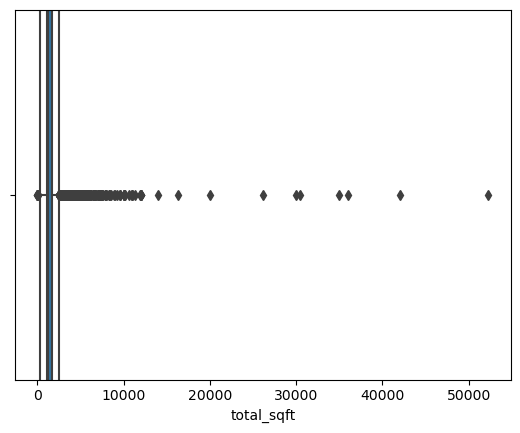

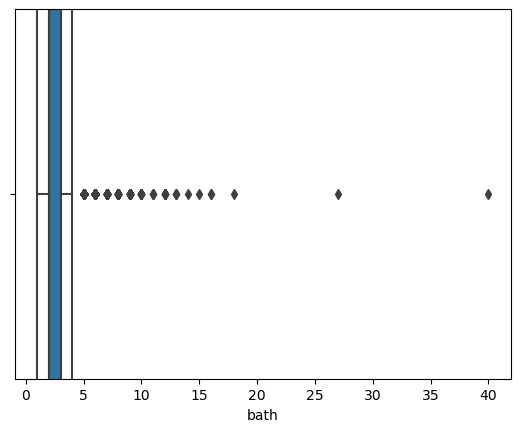

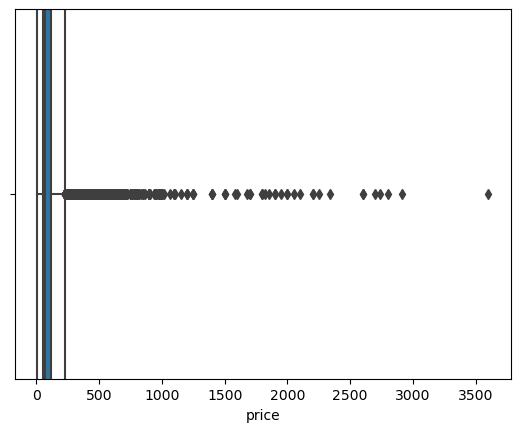

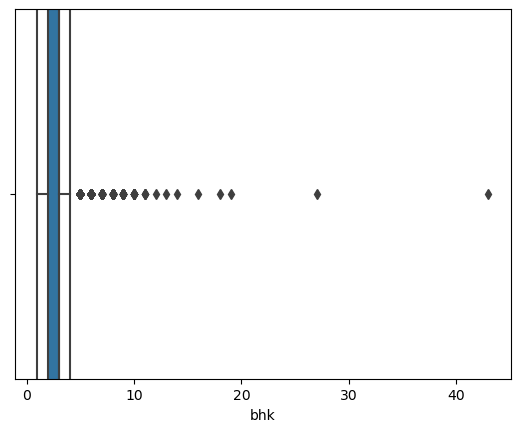

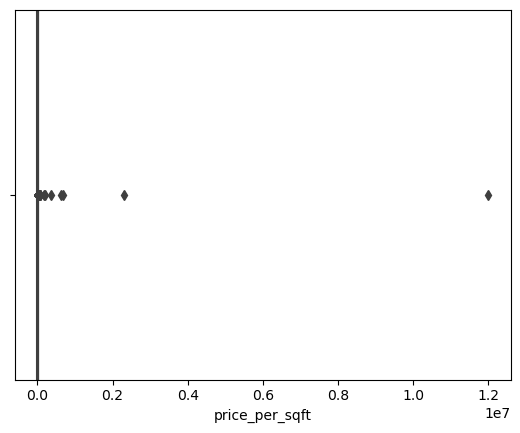

In [4]:
import warnings as wr
wr.filterwarnings("ignore")

for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i,width=1000)
  plt.show()

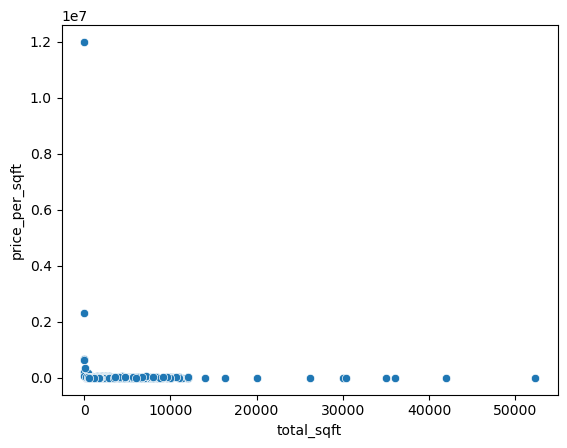

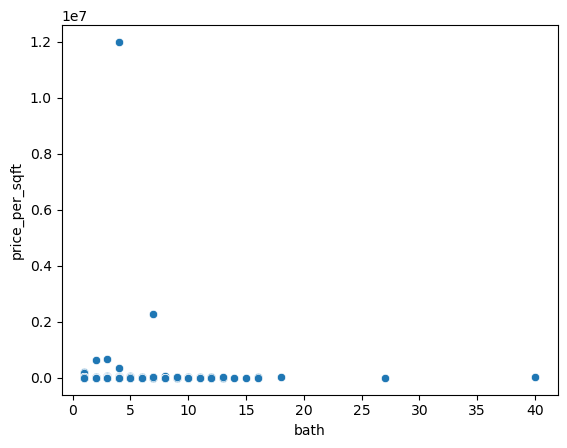

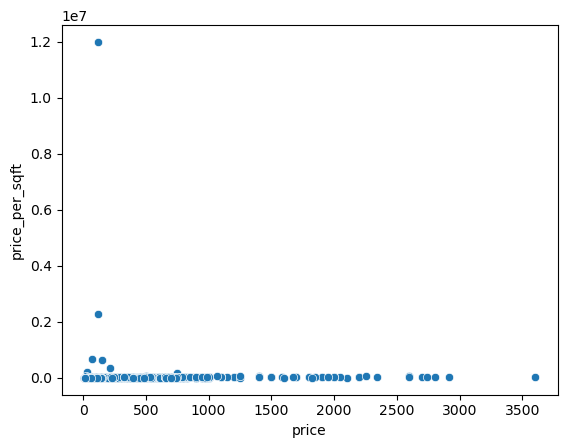

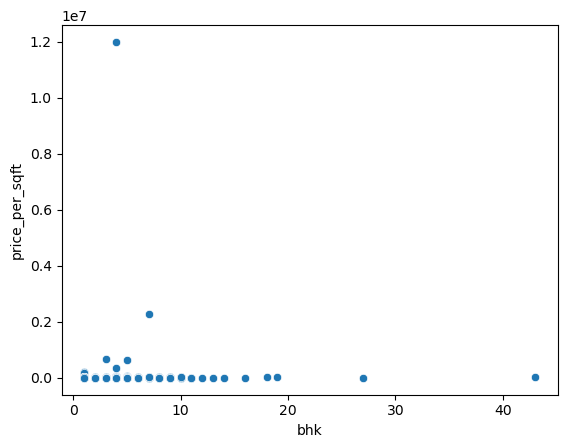

In [22]:
for i in ['total_sqft', 'bath', 'price', 'bhk']:
   sns.scatterplot(data=df,x=i,y='price_per_sqft')
   plt.show()

In [23]:
df.select_dtypes(include="number").columns


Index(['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft'], dtype='object')

In [24]:
s=df.select_dtypes(include='number').corr()


<Axes: >

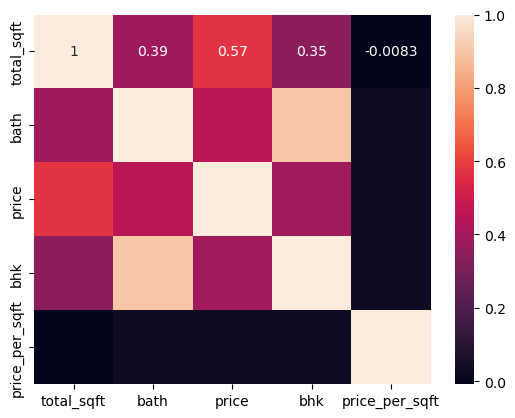

In [25]:
sns.heatmap(s,annot=True)


# As there is no missing values there is no need of imputations.

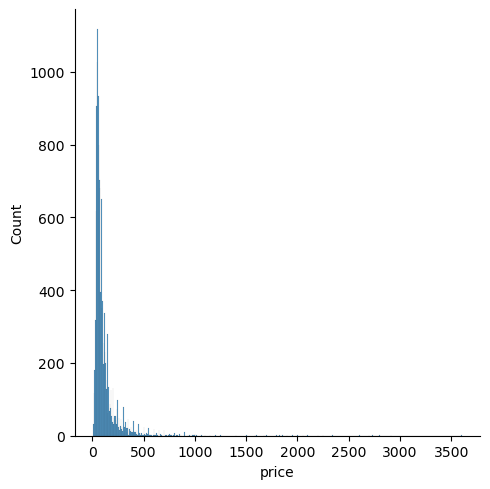

In [26]:
sns.displot(df['price'])


<Axes: >

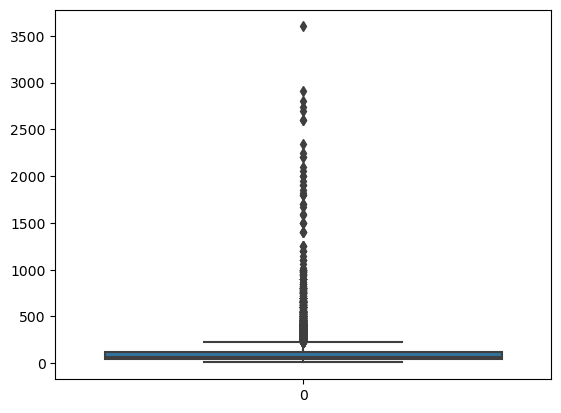

In [27]:
sns.boxplot(df['price'])


In [65]:
def whisker(col):
   q1,q3=np.percentile(col,[5,95])
   iqr=q3-q1
   lw=q1-1.5*iqr
   uw=q3+1.5*iqr
   return lw,uw,iqr

In [67]:

whisker(df['price'])


(-10.876217858994812, -10.876217858994812, 0.0)

In [68]:
for i in('price','bhk','total_sqft'):
    lw,uw,iq=whisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]<uw,uw,df[i])
    print(lw,uw,iq)

-10.876217858994812 -10.876217858994812 0.0
9.5 9.5 0.0
7033.449999999981 7033.449999999981 0.0


In [69]:
df.columns


Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

## Z -Score method

In [70]:
upper_limit=df['total_sqft'].mean()+3*df['total_sqft'].std()
lower_limit=df['total_sqft'].mean()-3*df['total_sqft'].std()
print("upper_limit:",upper_limit, "\nlower_limit",lower_limit)

upper_limit: 9233.583030774194 
lower_limit 4882.9260298318295


In [71]:
df.loc[(df['total_sqft']>upper_limit) | (df['total_sqft']<lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
404,Rajaji Nagar,7 BHK,12000.0,6.0,-10.876159,9.5,18333
435,Whitefield,4 Bedroom,11890.0,4.0,-10.876218,9.5,5887
598,Malleshwaram,7 BHK,12000.0,7.0,-10.876159,9.5,18333
665,Yelahanka,3 BHK,35000.0,3.0,-10.876218,9.5,371
798,other,4 Bedroom,10961.0,4.0,-10.876218,9.5,729
1218,other,4 Bedroom,14000.0,3.0,-10.876216,9.5,5714
1867,other,3 Bedroom,52272.0,2.0,-10.876218,9.5,267
2081,Kothanur,5 Bedroom,9600.0,5.0,-10.876218,9.5,5729
2589,other,6 BHK,11338.0,9.0,-10.876208,9.5,8819
2592,other,4 Bedroom,30000.0,4.0,-10.876163,9.5,7000


In [72]:
new_def= df.loc[(df['total_sqft']<upper_limit) | (df['total_sqft']>lower_limit)]
print("Old Data:",len(df))
print("New Data:",len(new_def))

Old Data: 13200
New Data: 13200


<Axes: >

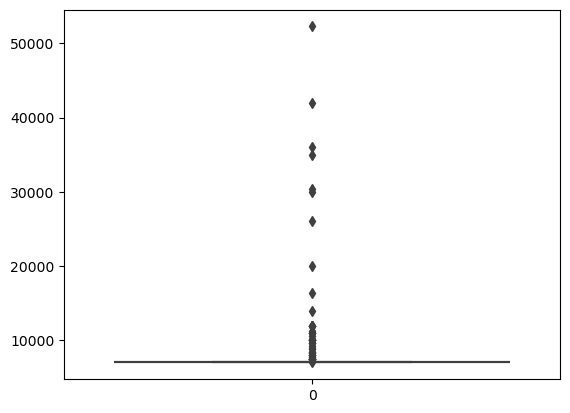

In [73]:
sns.boxplot(new_def['total_sqft'])


In [74]:
new_def=df.copy()
new_def.loc[new_def['total_sqft']>upper_limit,'total_sqft']=upper_limit
new_def.loc[new_def['total_sqft']>lower_limit,'total_sqft']=lower_limit

<Axes: >

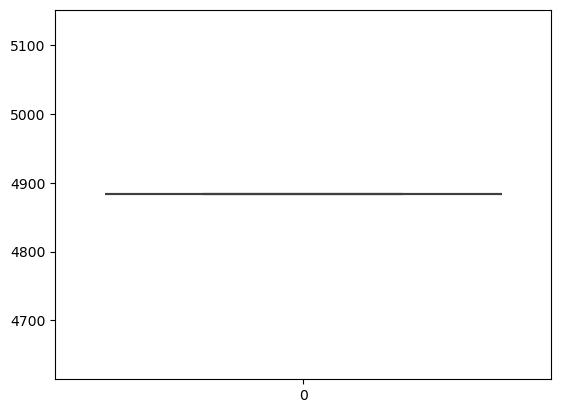

In [75]:
sns.boxplot(new_def['total_sqft'])


<Axes: >

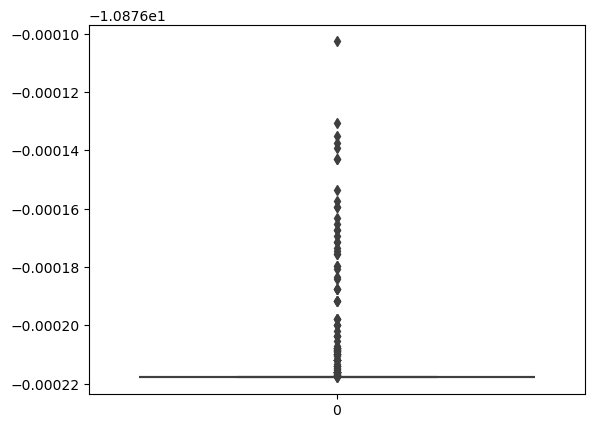

In [76]:
new_def=df.copy()
new_def.loc[new_def['price']>upper_limit,'price']=upper_limit
new_def.loc[new_def['price']>lower_limit,'price']=lower_limit

sns.boxplot(new_def['price'])

In [77]:
m=df.price.mean()
m

-10.876217695579566

In [78]:
s=df.price.std()
s

2.852119783936006e-06

In [79]:
m-3*s 

-10.876226251938919

In [80]:
m+3*s 


-10.876209139220213

In [81]:
df["price"]=(df.price-m)/s
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,7033.45,2.0,-0.057296,9.5,3699
1,Chikka Tirupathi,4 Bedroom,7033.45,5.0,-0.057296,9.5,4615
2,Uttarahalli,3 BHK,7033.45,2.0,-0.057296,9.5,4305
3,Lingadheeranahalli,3 BHK,7033.45,3.0,-0.057296,9.5,6245
4,Kothanur,2 BHK,7033.45,2.0,-0.057296,9.5,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,7033.45,4.0,-0.057296,9.5,6689
13196,other,4 BHK,7033.45,5.0,-0.057296,9.5,11111
13197,Raja Rajeshwari Nagar,2 BHK,7033.45,2.0,-0.057296,9.5,5258
13198,Padmanabhanagar,4 BHK,7033.45,4.0,-0.057296,9.5,10407


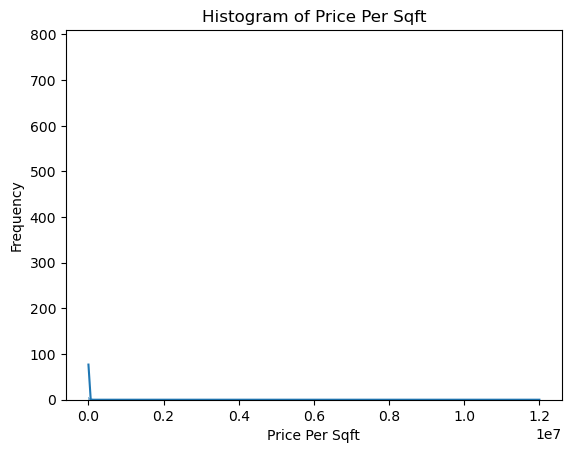

In [5]:
import seaborn as sns
wr.filterwarnings("ignore")
sns.histplot(df['price_per_sqft'],kde='True')
plt.title('Histogram of Price Per Sqft')
plt.xlabel('Price Per Sqft')
plt.ylabel('Frequency')
plt.show()

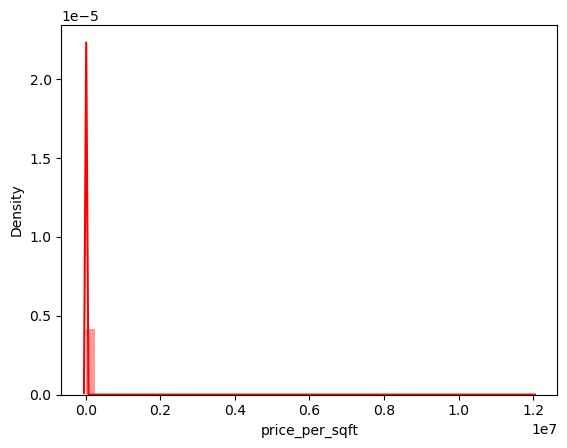

In [6]:
import seaborn as sns
wr.filterwarnings("ignore")

sns.distplot(df["price_per_sqft"],color='r')
plt.show()

In [7]:
from scipy.stats import skew, kurtosis

In [8]:
df['price'].skew()


8.1001908436817

In [9]:
kurtosis(df['price'],fisher=False)  


111.5622509727068

In [10]:
df['log_price']=np.log(df["price"])
df['log_price']

0        3.665355
1        4.787492
2        4.127134
3        4.553877
4        3.931826
           ...   
13195    5.442418
13196    5.991465
13197    4.094345
13198    6.190315
13199    2.833213
Name: log_price, Length: 13200, dtype: float64

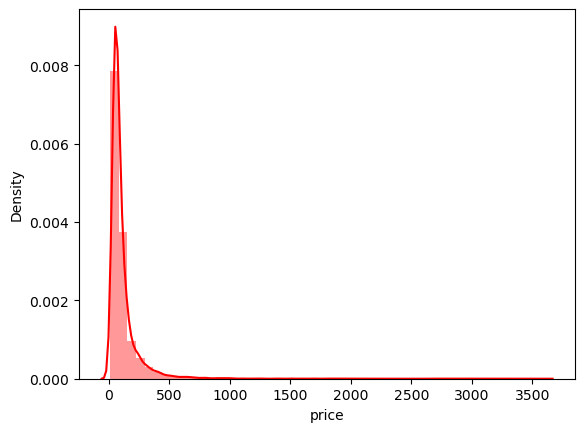

In [11]:
wr.filterwarnings("ignore")

sns.distplot(df["price"],color='r')
plt.show()

In [12]:
df['log_price'].skew()

0.8431357960666708

In [13]:
kurtosis(df['log_price'],fisher=False)


4.35029920656377

In [14]:
old_df=pd.read_csv("C:\\Users\\aneet\\Downloads\\house_price.csv")

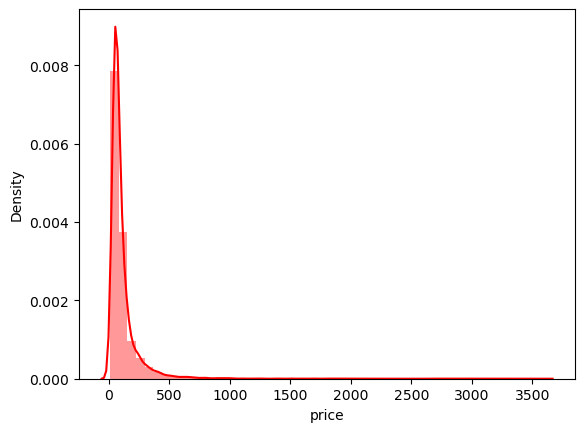

In [15]:
wr.filterwarnings("ignore")

sns.distplot(old_df["price"],color='r')
plt.show()